In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.13.0


In [2]:
## 기존 ver

# import tensorflow as tf

# with tf.device('/gpu:0'):
#     a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2,3], name='a')
#     b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3,2], name='b')
#     c = tf.matmul(a,b)

# with tf.Session() as sess:
#     print (sess.run(c))

# # 그래프 생성

# a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2,3], name='a')
# b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3,2], name='b')
# c = tf.matmul(a,b)

# # 디바이스가 True 일 때 세션 생성
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

# # 연산 수행
# print(sess.run(c))

In [3]:
import tensorflow as tf

# GPU 디바이스 지정은 선택 사항이며, TensorFlow 2.x는 자동으로 디바이스 배치를 처리합니다.
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)

print(c)  # 결과를 바로 출력


tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


2024-08-20 16:22:47.885326: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-08-20 16:22:47.885343: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-08-20 16:22:47.885348: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-08-20 16:22:47.885374: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-20 16:22:47.885388: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
from numpy import loadtxt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# 데이터 로드
#dataset = loadtxt('diabetes.csv', delimiter=',', skiprows=1)
dataset = pd.read_csv('diabetes.csv')

# x,y로 분리
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

# 모델 학습
model = XGBClassifier(max_depth=2)
model.fit(x_train, y_train)

# 예측
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

# 평가
accuracy = accuracy_score(y_test, predictions)
print('Accuracy : %.2f%%' % (accuracy * 100.0))

Accuracy : 75.97%


In [5]:
value = np.array([1,161,72,35,0,28.1,0.527,20]).reshape(1,-1)

l = model.predict_proba(value)
print('No diabetes : {:.2%}\n Yes diabetes : {:.2%}'.format(l[0][0], l[0][1]))

No diabetes : 46.91%
 Yes diabetes : 53.09%


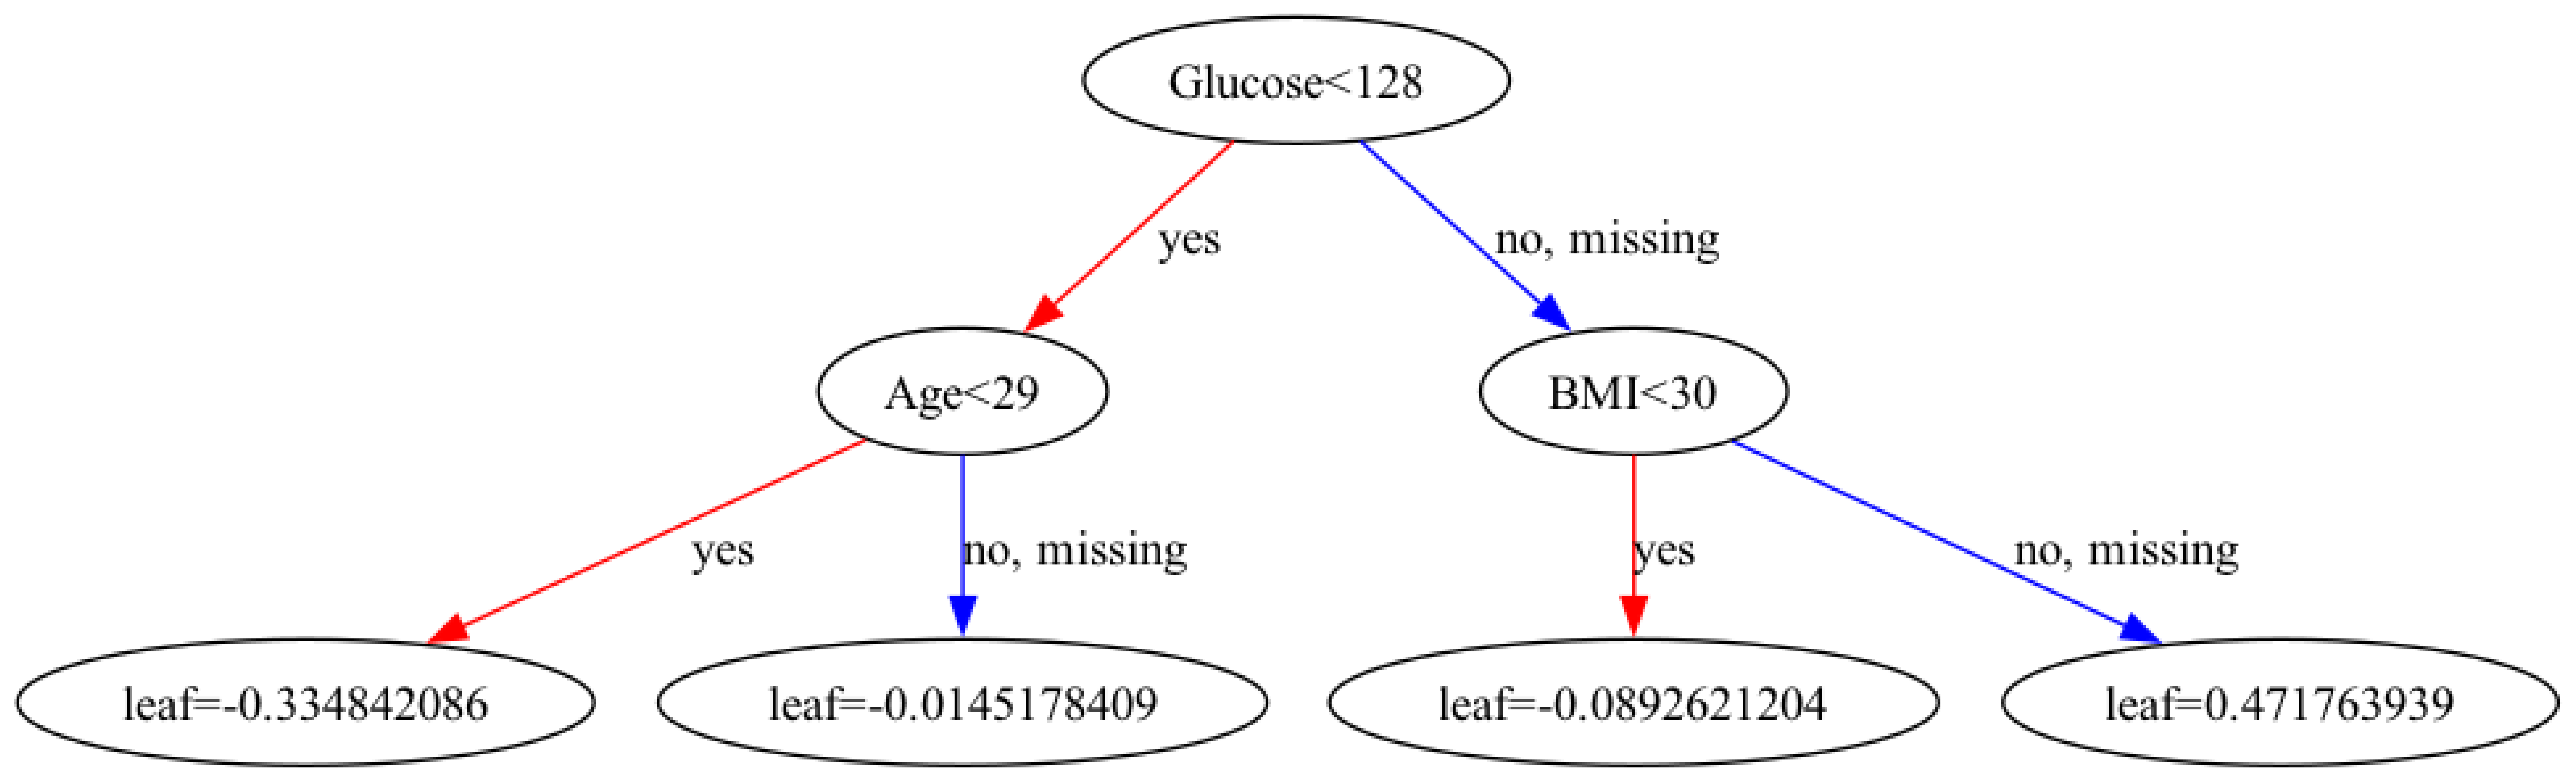

In [6]:
%matplotlib inline

import graphviz
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 100, 200

plot_tree(model)
plt.show()

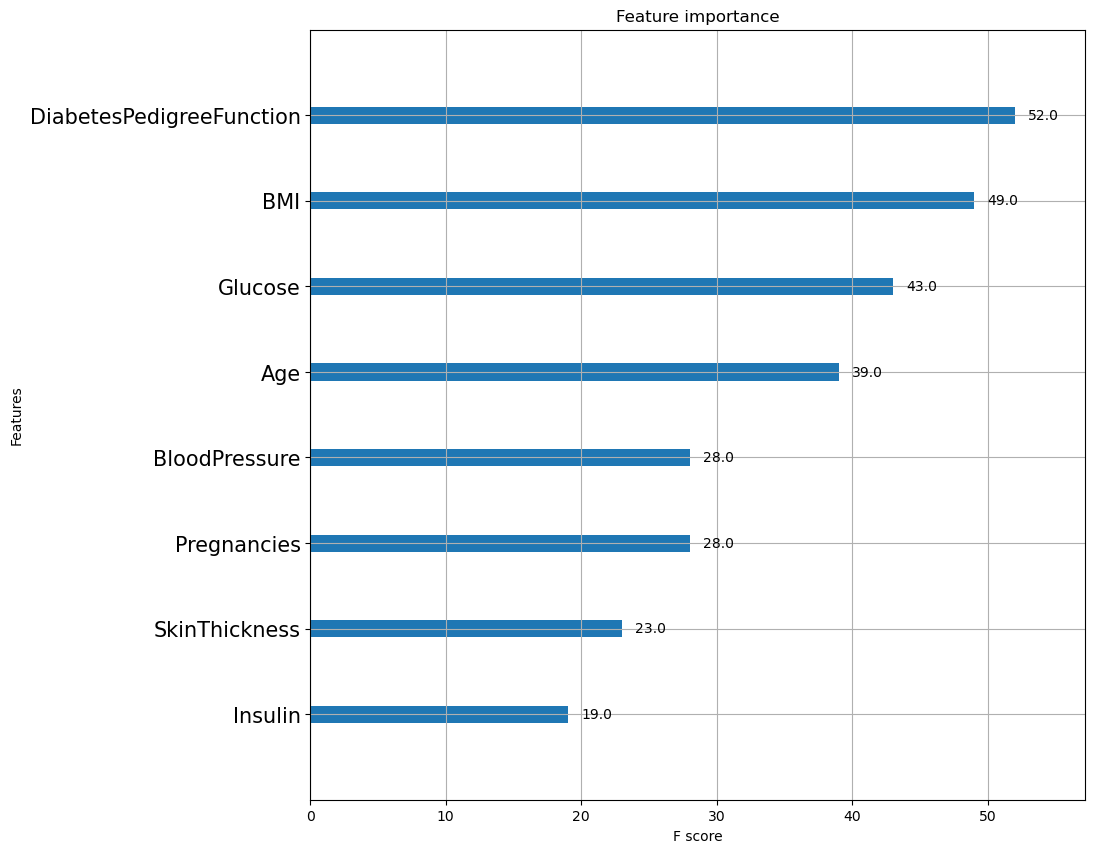

In [7]:
from xgboost import plot_importance

rcParams['figure.figsize'] = 10, 10

plot_importance(model)

plt.yticks(fontsize=15)
plt.show()

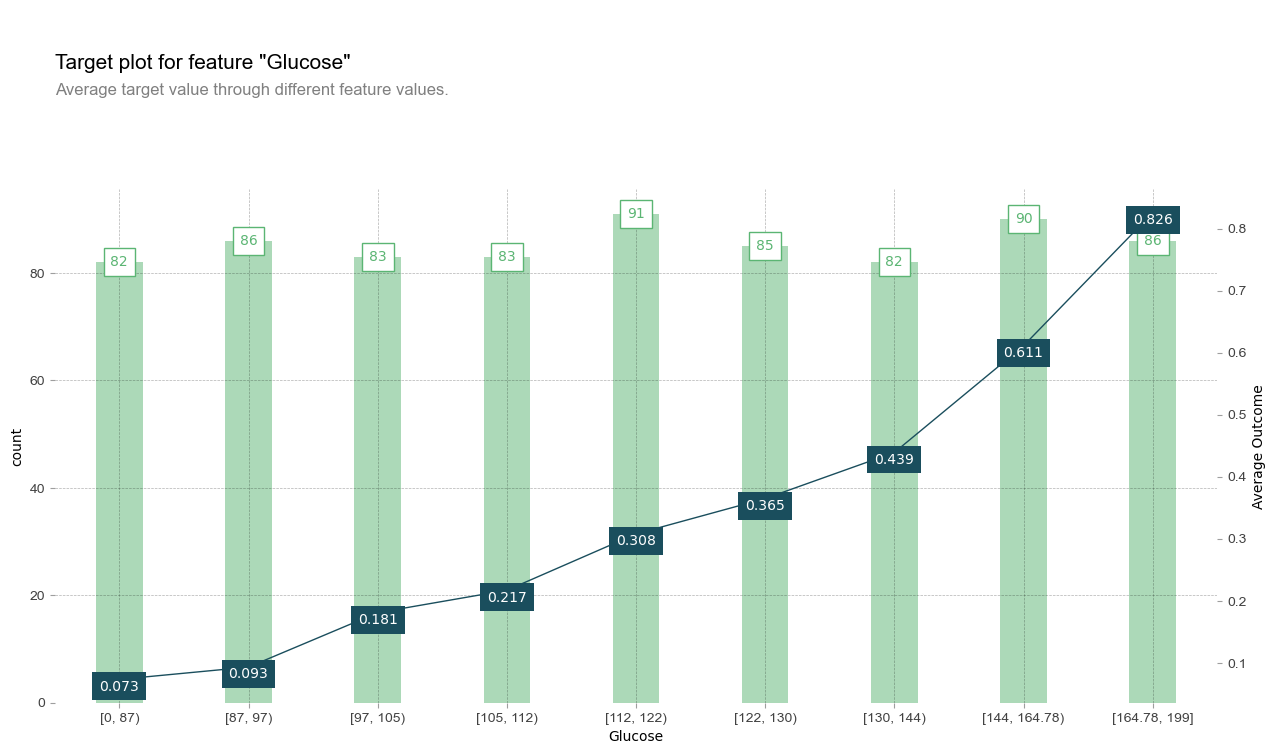

In [8]:
from pdpbox import info_plots

pima_data = dataset
pima_features = dataset.columns[:8]
pima_target = dataset.columns[8]

#이전 ver.
fig, axes, summary_df = info_plots.target_plot(
    df=pima_data,
    feature='Glucose',
    feature_name='Glucose',
    target=pima_target
)

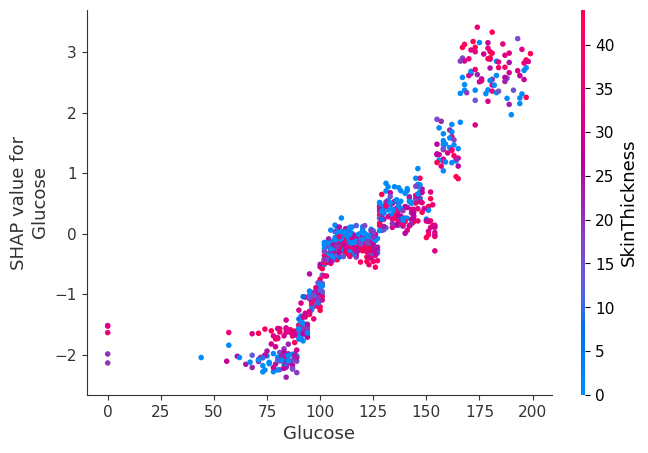

'\nX축: "Glucose" 피처 값: X축은 pima_data의 "Glucose" 피처 값입니다. 즉, 플롯의 각 점은 특정 샘플의 글루코스 수치에 해당합니다.\n\nY축: SHAP 값: Y축은 해당 피처 값이 모델 예측에 기여하는 정도를 나타냅니다.\n    SHAP 값이 양수이면 "Glucose" 값이 해당 샘플의 예측을 1 (예: 당뇨병 있음) 방향으로 끌어올린다는 것을 의미합니다. 반대로 음수이면 예측을 0 (예: 당뇨병 없음) 방향으로 끌어내린다는 것을 의미합니다.\n\n색상: 다른 피처와의 상호작용: 점들의 색상은 pima_data 내의 또 다른 피처의 값을 나타냅니다. \n    기본적으로, 이 피처는 SHAP 값에 가장 큰 영향을 미치는 상호작용 피처입니다.\n    예를 들어, 색상으로 "BMI" 값을 표현할 수 있습니다. 이 경우, 색상이 다른 피처와의 상호작용을 시각적으로 보여줍니다. 동일한 "Glucose" 값에서 상호작용 피처가 달라지면 SHAP 값도 달라질 수 있습니다.\n'

In [9]:
import shap #SHAP (SHapley Additive exPlanations)란, 모델 예측의 해석 가능성을 제공하는 강력한 방법론(pdp 대체용)

explainer = shap.Explainer(model, pima_data)
shap_values = explainer(pima_data)

shap.dependence_plot("Glucose", shap_values.values, pima_data)

'''
X축: "Glucose" 피처 값: X축은 pima_data의 "Glucose" 피처 값입니다. 즉, 플롯의 각 점은 특정 샘플의 글루코스 수치에 해당합니다.

Y축: SHAP 값: Y축은 해당 피처 값이 모델 예측에 기여하는 정도를 나타냅니다.
    SHAP 값이 양수이면 "Glucose" 값이 해당 샘플의 예측을 1 (예: 당뇨병 있음) 방향으로 끌어올린다는 것을 의미합니다. 반대로 음수이면 예측을 0 (예: 당뇨병 없음) 방향으로 끌어내린다는 것을 의미합니다.

색상: 다른 피처와의 상호작용: 점들의 색상은 pima_data 내의 또 다른 피처의 값을 나타냅니다. 
    기본적으로, 이 피처는 SHAP 값에 가장 큰 영향을 미치는 상호작용 피처입니다.
    예를 들어, 색상으로 "BMI" 값을 표현할 수 있습니다. 이 경우, 색상이 다른 피처와의 상호작용을 시각적으로 보여줍니다. 동일한 "Glucose" 값에서 상호작용 피처가 달라지면 SHAP 값도 달라질 수 있습니다.
'''

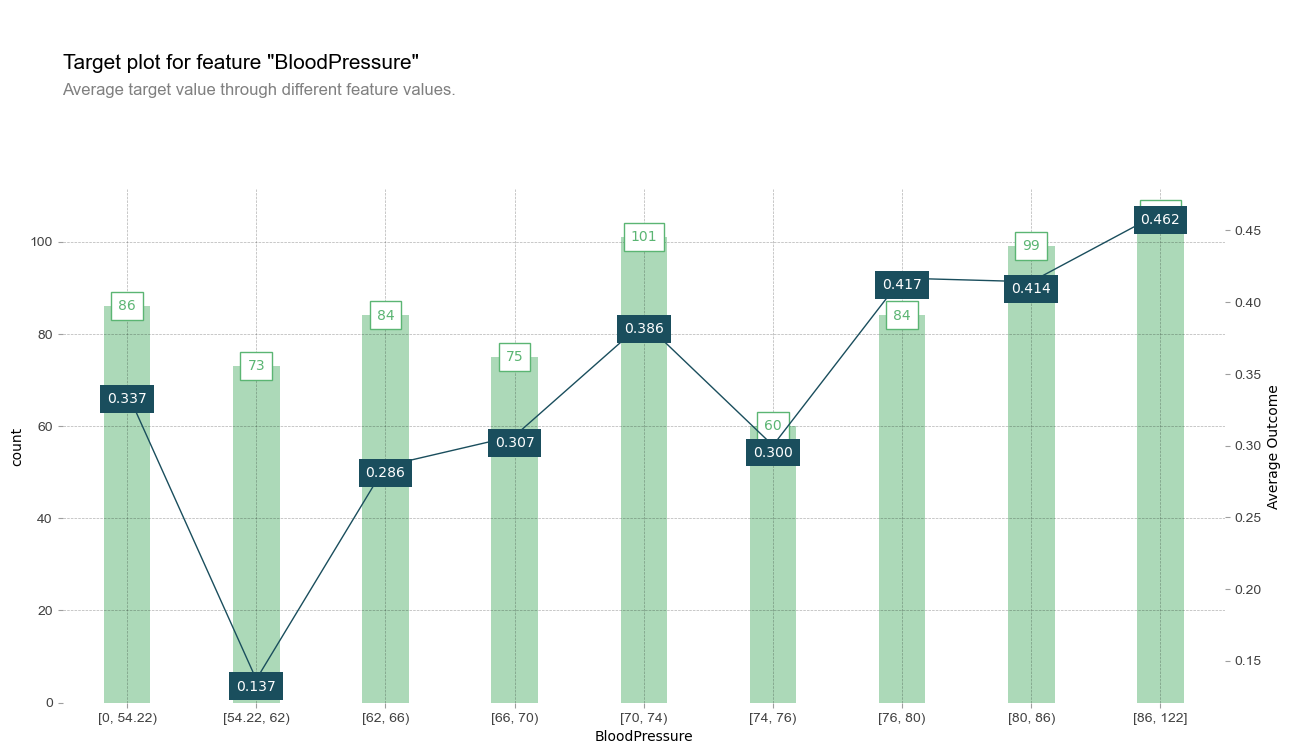

In [10]:
from pdpbox import info_plots

pima_data = dataset
pima_features = dataset.columns[:8]
pima_target = dataset.columns[8]

#이전 ver.
fig, axes, summary_df = info_plots.target_plot(
    df=pima_data,
    feature='BloodPressure',
    feature_name='BloodPressure',
    target=pima_target
)

In [11]:
summary_df

,x,display_column,value_lower,value_upper,count,Outcome
0,0,"[0, 54.22)",0.000000,54.222222,86,0.337209
1,1,"[54.22, 62)",54.222222,62.000000,73,0.136986
2,2,"[62, 66)",62.000000,66.000000,84,0.285714
3,3,"[66, 70)",66.000000,70.000000,75,0.306667
4,4,"[70, 74)",70.000000,74.000000,101,0.386139
5,5,"[74, 76)",74.000000,76.000000,60,0.300000
6,6,"[76, 80)",76.000000,80.000000,84,0.416667
7,7,"[80, 86)",80.000000,86.000000,99,0.414141
8,8,"[86, 122]",86.000000,122.000000,106,0.462264



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


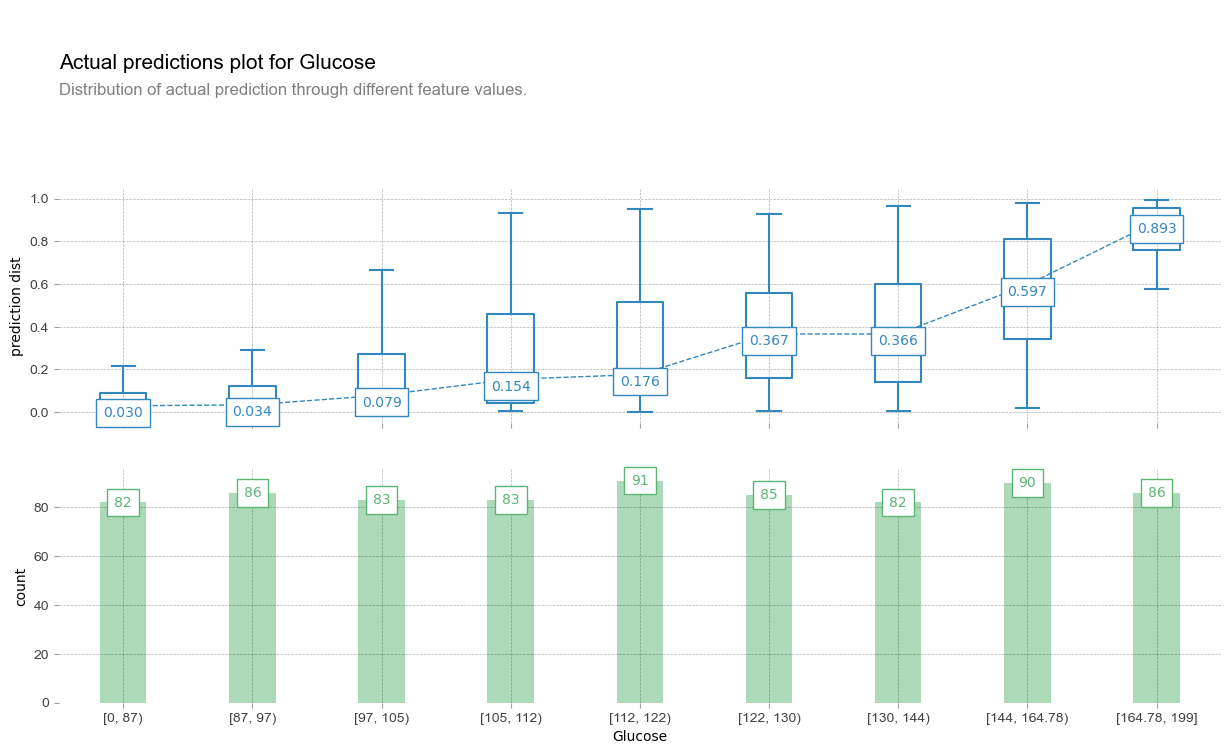

In [12]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model,
    X=pima_data[pima_features],
    feature='Glucose',
    feature_name='Glucose',
    predict_kwds={}
)

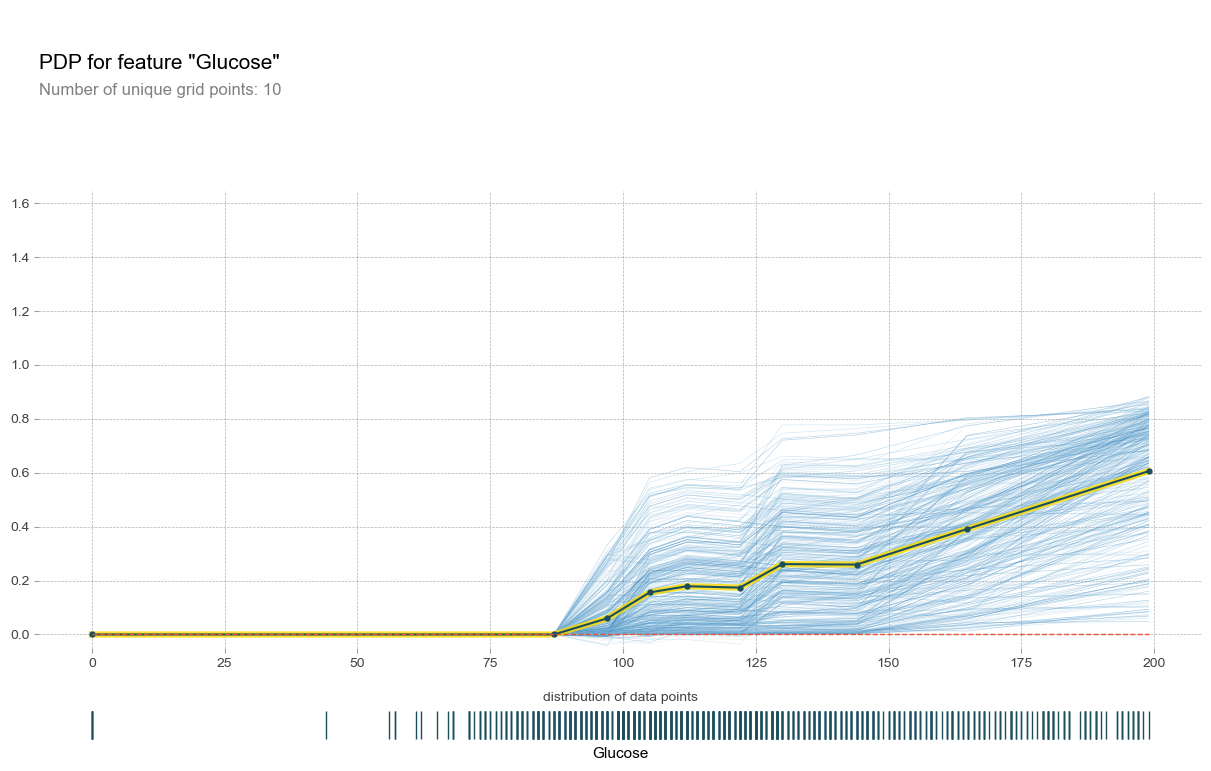

In [14]:
from pdpbox import pdp

pdp_gc = pdp.pdp_isolate(
    model=model,
    dataset=pima_data,
    model_features=pima_features,
    feature='Glucose'
)

#플롯 정보 설정
fig, axes = pdp.pdp_plot(
    pdp_gc, #pdp 값을 계산한 결과
    'Glucose', #pdp를 생성할 피처의 이름
    plot_lines=True, # 피처 값의 변황 따른 예측 변화 추세 보이기
    frac_to_plot=0.5, # 전체 데이터의 50%를 랜덤 샘플링하여 그래프에 표시
    plot_pts_dist=True #데이터 포인트의 분포 시각화 여부(하단 바코드 같은 그래프 = 데이터 밀집도 확인 가능)
)

In [18]:
%matplotlib inline
fig, axes, summary_df = info_plots.target_plot_interact(
    df=pima_data,
    features=['BloodPressure', 'Glucose'],
    feature_names=['BloodPressure', 'Glucose'],
    target=pima_target
)

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 1500x1000 with 5 Axes>

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

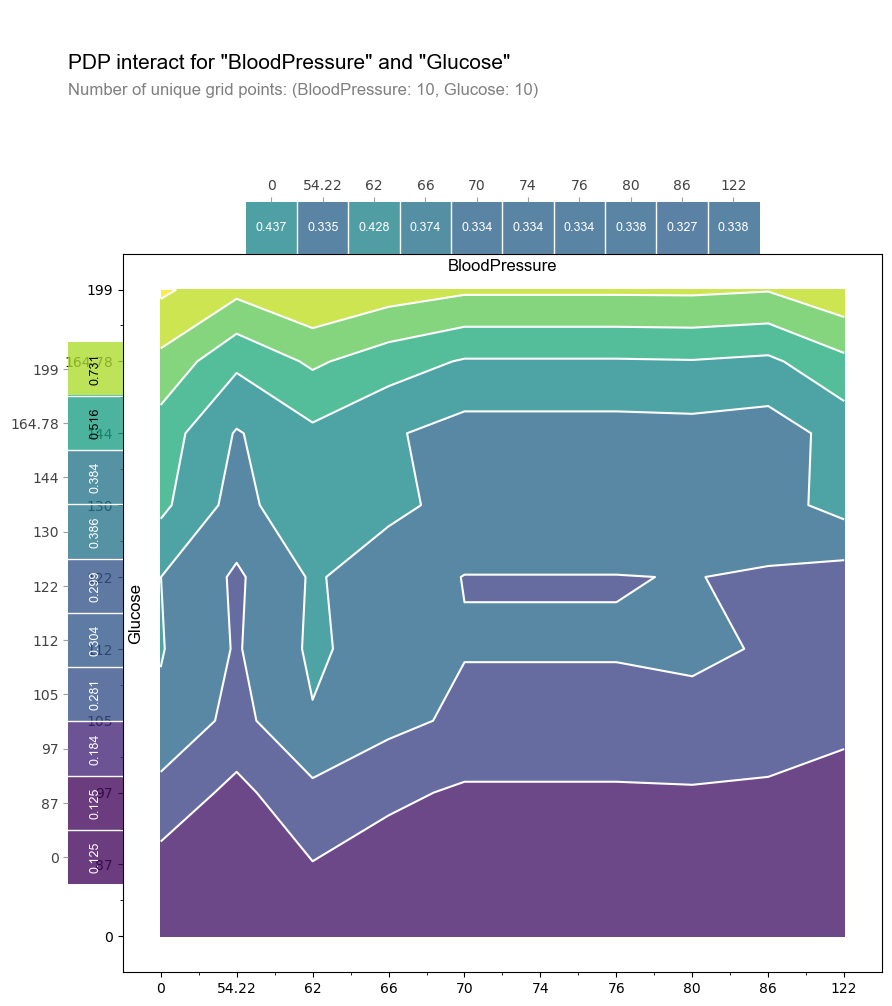

In [19]:
pdp_interaction = pdp.pdp_interact(
    model=model,
    dataset=pima_data,
    model_features=pima_features,
    features=['BloodPressure', 'Glucose']
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=pdp_interaction,
    feature_names=['BloodPressure', 'Glucose'],
    plot_type='contour', #등고선 방식
    x_quantile=True,
    plot_pdp=True
)

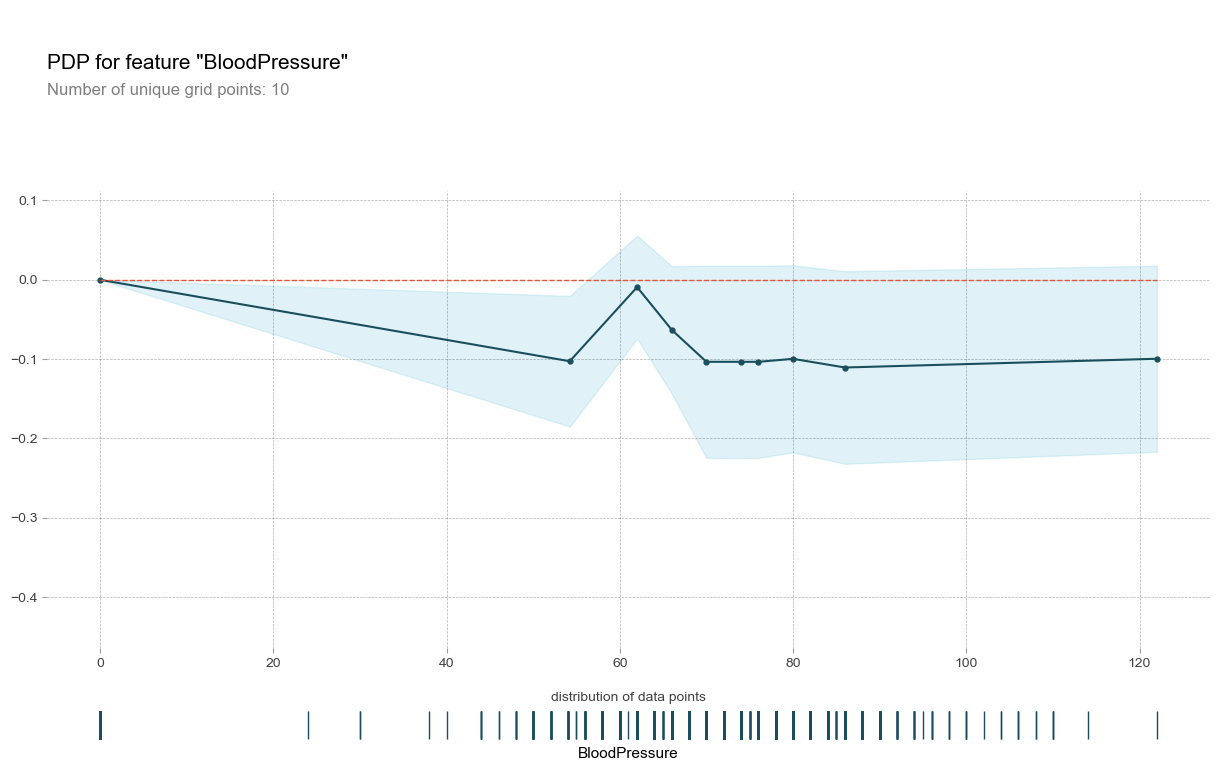

In [23]:
pdp_bp = pdp.pdp_isolate(
    model=model,
    dataset=pima_data,
    model_features=pima_features,
    feature='BloodPressure'
)

fig, axes = pdp.pdp_plot(pdp_bp,
                         'BloodPressure',
                         
                         plot_lines=False,
                         frac_to_plot=0.5,
                         plot_pts_dist=True)